In [3]:
import math
import matplotlib.pyplot as plt

In [22]:
def make_graph(y,var,k,flip):
    
    range_ = []
    data = []
    custom_color = []
    if flip:
        sum = 1-accu_geometric(y,p,k-1,False)
    else:
        sum = accu_geometric(y,p,k,False)
    length = find_length(k,p)
    # Get data
    for i in range(0, length):
        data.append(single_geometric(i,p))
        range_.append(i)
        # Show highligthed colors
        if flip:
            if k <= i <= length:
                custom_color.append('green')
            else:
                custom_color.append('red')
        else:
            if y <= i <= k:
                custom_color.append('green')
            else:
                custom_color.append('red')
        # plotting chart
    plt.bar(range_, data, tick_label = range_,
            width = 0.7, color = custom_color)
    # Add numbers to bars
    for i in range(len(data)):
        if data[i] > 0.000009:
            plt.annotate(str(f'{data[i]:.5f}'), xy=(range_[i],data[i]), ha='center', va='bottom')
    # naming the x-axis
    if flip:
        plt.xlabel(f'P(x≥{k}): {sum:.4f} --- µ: {my:.4f} --- σ2: {var:.4f} --- σ: {std:.4f}')
    else:
        plt.xlabel(f'P({y}≤X≤{k}): {sum:.4f} --- µ: {my:.4f} --- σ2: {var:.4f} --- σ: {std:.4f}')
    # y-axis
    plt.ylabel(f'P(X=k)')
    # title
    plt.title('Binomial distribution!')
    # show the plot
    plt.show()

In [12]:
def find_length(k,p):
    steps = 0
    answer = 0
    while answer <= 0.99999:
        answer += single_geometric(k,p)
        steps += 1
    return steps

In [6]:
def accu_geometric(y,p,k,steps):
    answer = 0
    for x in range(y,k+1):
        new_answer = single_geometric(x,p)
        if steps:
            print(f'Probability of Y = {x}: {new_answer:.5f}')
        answer += new_answer
    return answer

In [7]:
def single_geometric(k,p):
    answer = pow((1-p),k)*p
    return answer

---------------Geometric---------------
Expected value (µ): 12.00000 --- Variance (σ2): 156.00000 --- Standard deviation (σ): 12.49000
Probability of X: Y = 5: 0.051552070942561416
Probability of X: Y ≥ 5: 0.6701769222801055
---------------------------------------


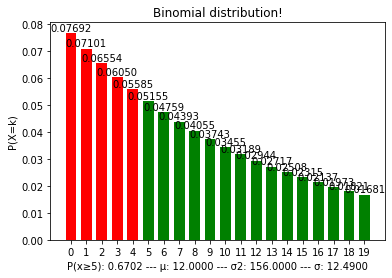

In [25]:
# Geometric where X is number of failures before success
p = 0.07692307692
# From
y = 0
# To
k = 5

flip = True

my = (1-p)/p
var = (1-p)/(pow(p,2))
std = math.sqrt(var)

print('---------------Geometric---------------')
print(f'Expected value (µ): {my:.5f} --- Variance (σ2): {var:.5f} --- Standard deviation (σ): {std:.5f}')
print(f'Probability of X: Y = {k}: {single_geometric(k,p)}')
if flip:
    print(f'Probability of X: Y ≥ {k}: {1-accu_geometric(y,p,k-1,False)}')
else:
    print(f'Probability of X: {y} ≤ Y ≤ {k}: {accu_geometric(y,p,k,False)}')
print('---------------------------------------')      
make_graph(y,var,k,flip)